# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Dropout ,BatchNormalization
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [19]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

Found 1658 files belonging to 4 classes.
Using 1327 files for training.
Found 1658 files belonging to 4 classes.
Using 331 files for validation.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [20]:
data_iterator=data.as_numpy_iterator()

In [21]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

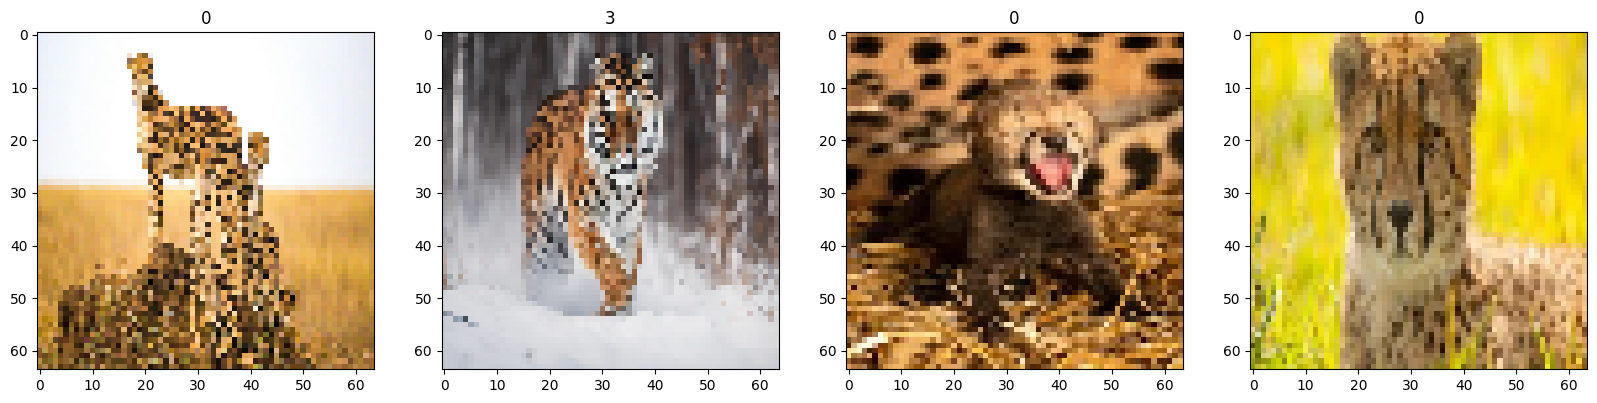

In [22]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [23]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
data = data.map(lambda x, y: (normalization_layer(x), y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [24]:
data_size = len(data)
train_size = int(0.8 * data_size)
val_size = int(0.1 * data_size)
test_size = data_size - train_size - val_size

# Convert labels to one-hot encoding
def preprocess(image, label):
    return image, tf.one_hot(tf.cast(label, tf.int32), depth=4)

data = data.map(preprocess)

# Split the dataset
train_dataset = data.take(train_size)
val_dataset = data.skip(train_size).take(val_size)
test_dataset = data.skip(train_size + val_size)

**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


**Q.6** Compile your model

In [26]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [27]:
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15
)

Epoch 1/15
33/33 [==============================] - 22s 483ms/step - loss: 3.3001 - accuracy: 0.4470 - val_loss: 2.2795 - val_accuracy: 0.3047
Epoch 2/15
33/33 [==============================] - 19s 520ms/step - loss: 1.5898 - accuracy: 0.5729 - val_loss: 3.2411 - val_accuracy: 0.3750
Epoch 3/15
33/33 [==============================] - 21s 599ms/step - loss: 0.9519 - accuracy: 0.6780 - val_loss: 4.9133 - val_accuracy: 0.2891
Epoch 4/15
33/33 [==============================] - 20s 549ms/step - loss: 0.5974 - accuracy: 0.7907 - val_loss: 6.1712 - val_accuracy: 0.2812
Epoch 5/15
33/33 [==============================] - 20s 566ms/step - loss: 0.4910 - accuracy: 0.8381 - val_loss: 4.0694 - val_accuracy: 0.3906
Epoch 6/15
33/33 [==============================] - 19s 516ms/step - loss: 0.4552 - accuracy: 0.8466 - val_loss: 3.9462 - val_accuracy: 0.3984
Epoch 7/15
33/33 [==============================] - 18s 513ms/step - loss: 0.3393 - accuracy: 0.8892 - val_loss: 2.8803 - val_accuracy: 0.5234

**Q.8** Test your code with test set

In [28]:
loss,accuracy=model.evaluate(test_dataset)

5/5 [==============================] - 10s 5ms/step - loss: 0.3541 - accuracy: 0.8601


In [29]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8601398468017578


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**